# **Graded Challenge 2**

Karel Gideon Anugrah Hutajulu | FTDS HCK-BATCH-004

### Objective

`"Problem 1:"` Apply knowledge of data cleaning(removing outliers), taking sample and using confidence interval and hypothesis testing to obtain useful insight that can help the mayor of Austin in making important decisions.

`"Problem 2:"` Apply knowledge of linear algebra and calculus.


## Problem I: Statistics

## I. USED LIBRARIES

In [418]:
import pandas as pd
import numpy as np
#Plotting graphs to extract insight
import matplotlib.pyplot as plt
#Plotting histogram with density line
import seaborn as sns
#Used to find norm and during hypothesis testing
from scipy.stats import mode


## II. DATA LOADING




Before we download our dataset, we will use google cloud to query the data and only select the columns that is relevant to the investigation.


In [419]:
'''
SELECT

#Remove collumns that will not be used in this case study.

austinwaste.report_date,
austinwaste.load_time,
austinwaste.load_type,
austinwaste.load_weight,
austinwaste.dropoff_site

FROM `bigquery-public-data.austin_waste.waste_and_diversion` AS austinwaste

#Only selects rows between a specific time frame

WHERE
austinwaste.report_date BETWEEN '2021-01-01' AND '2021-07-09' 
'''

"\nSELECT\n\n#Remove collumns that will not be used in this case study.\n\naustinwaste.report_date,\naustinwaste.load_time,\naustinwaste.load_type,\naustinwaste.load_weight,\naustinwaste.dropoff_site\n\nFROM `bigquery-public-data.austin_waste.waste_and_diversion` AS austinwaste\n\n#Only selects rows between a specific time frame\n\nWHERE\naustinwaste.report_date BETWEEN '2021-01-01' AND '2021-07-09' \n"

###Importing our dataset 

We import the dataset using the "pd.read_csv" because the dataset file format is CSV.

In [420]:
#Importing 2021 austin and waste diversion data from query result in google cloud.


raw_data = pd.read_csv('/content/h8dsft_P0GC2_karel_hutajulu.csv')

To test if our dataset has been imported successfuly we use the `".head"` and `".tail"`method 

In [421]:
raw_data.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF


In [422]:
raw_data.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH
26156,2021-03-01,2021-03-01 10:22:00 UTC,RECYCLED METAL,360.0,AUSTIN IRON AND METAL


## III. PROBLEM QUESTIONS




### 1. Sebelum melakukan perhitungan dan analisa statistik, lakukan pembersihan data terlebih dahulu. Pastikan tidak ada missing value, dsb.






Check if there are null values in the dataset

In [423]:
raw_data.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64


We then will use the `".drop"` method

The drop() method removes the specified row or column. By specifying the axis ( axis=1 == columns ), the drop() method removes the specified column.

In [424]:
raw_data.dropna(inplace=True)
#Remove all rows with a load_weight value of 0. A shipment with 0 waste is not possible.
raw_data = raw_data[raw_data.load_weight != 0]

Now we check again to make sure the sum of null values is 0.

In [425]:
raw_data.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

### Checking data-types

Before we explore the data, we must first check if each column has the proper datatype. 

In [426]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25106 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   25106 non-null  object 
 1   load_time     25106 non-null  object 
 2   load_type     25106 non-null  object 
 3   load_weight   25106 non-null  float64
 4   dropoff_site  25106 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.1+ MB



We will also convert the datatypes in column 'report_date' and 'load_time' which is previously '**object**' to '**datetime64**'.

*Why?*

Because we will `"groupby"` the dates my month and a datetime64 datatype is required to do this.

In [427]:
raw_data['report_date'] = pd.to_datetime(raw_data['report_date'])
raw_data['load_time'] = pd.to_datetime(raw_data['load_time'])

#check the new datetime format
raw_data.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00+00:00,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00+00:00,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00+00:00,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00+00:00,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00+00:00,TIRES,1400.0,MRF


### 2. Selanjutnya, lakukan eksplorasi data sederhana guna mengetahui dan mengenali data yang kamu punya. Kamu bisa lakukan hal-hal berikut untuk mengeksplorasi data kamu.


*   Ada apa saja tipe load sampah di kota Austin berdasarkan data
*  Mengetahui tempat pembuangan sampah ada dimana saja
* Melihat rentang waktu pengambilan data



A&B) First we will sort the different load type and load site using a for loop.


---



**This is how the for loop is executed:**

A `"for"`loop is being executed for two string values in the list ['load_type', 'dropoff_site']. This means that the loop will run twice, once for each value in the list.

For each cycle of the loop, the current value of the loop variable `"i"` is being printed.

The `"value_counts()"` method returns the frequency of each unique label in the column.

After each cycle of the loop, a separator line of 50 dashes is being printed to visually separate the outputs for each iteration.


In [428]:
# visualize label count in each category
for i in ['load_type', 'dropoff_site']:
    print(i, ':')
    print(raw_data[i].value_counts())
    print('-'*50)

load_type :
GARBAGE COLLECTIONS          8241
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5749
BULK                         1594
BRUSH                        1514
SWEEPING                      360
MIXED LITTER                  326
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64
--------------------------------------------------
dropoff_site :
TDS LANDFILL             10688
ORGANICS BY GOSH          5741
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1652
MRF                        168
AUSTIN IRON AND METAL       50
ON ROUTE HIGH DUMP           7
GREAT NORTHERN               6
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD    

C) Find the range of dates by subtracting the `"max"` by the `"min"` value

In [429]:
date_range = raw_data['report_date'].max() - raw_data['report_date'].min()
print('Date range:', date_range)

Date range: 188 days 00:00:00


Grouping the values by month just incase we are going to display a graph with time being in one of the axis during data exploration

In [430]:
raw_data['month'] = raw_data['report_date'].dt.month 

raw_data['month'] = raw_data['month'].astype(int)

raw_data

,report_date,load_time,load_type,load_weight,dropoff_site,month
0,2021-07-08,2021-07-08 12:00:00+00:00,TIRES,2260.0,MRF,7
1,2021-07-08,2021-07-08 11:00:00+00:00,TIRES,1260.0,MRF,7
2,2021-07-08,2021-07-08 03:00:00+00:00,TIRES,800.0,MRF,7
3,2021-05-01,2021-05-01 12:29:00+00:00,TIRES,760.0,MRF,5
4,2021-07-03,2021-07-03 12:09:00+00:00,TIRES,1400.0,MRF,7
...,...,...,...,...,...,...
26152,2021-03-01,2021-03-01 11:26:00+00:00,ORGANICS,12100.0,ORGANICS BY GOSH,3
26153,2021-03-01,2021-03-01 04:27:00+00:00,ORGANICS,10900.0,ORGANICS BY GOSH,3
26154,2021-03-01,2021-03-01 05:55:00+00:00,ORGANICS,21800.0,ORGANICS BY GOSH,3
26155,2021-03-01,2021-03-02 01:10:00+00:00,ORGANICS,5640.0,ORGANICS BY GOSH,3


###3. Berdasarkan central tendency (mean, median, dan modus) untuk masing-masing site, insight/informasi apa yang bisa kamu sampaikan kepada pemerintah kota? (Caution: Jangan gunakan pd.DataFrame.describe())

We will now find the central tendency values based on each dropoff_site.

To begin we `"groupby"` the data into its respective site and then we calculate the 

1. Mean
2. Median
3. Mode

for each waste site.

In [431]:
grouped = raw_data.groupby('dropoff_site')

#Note: After seeing the long decimal points, i decide to round off the values to only 1 decimal place
median = grouped['load_weight'].median().round(1)
mean = grouped['load_weight'].mean().round(1)
#search mode using the mode function in scipy.stats
mode = grouped['load_weight'].apply(lambda x: mode(x)[0][0]).round(1)

#concatenate the central tendency values into 1 table
result = pd.concat([median, mean, mode], axis=1)
result.columns = ['median', 'mean', 'mode']
print(result)

                        median     mean     mode
dropoff_site                                    
AUSTIN IRON AND METAL    400.0    451.2    260.0
AUSTIN WOOD RECYCLING   4050.0   4050.0   2340.0
BALCONES RECYCLING      9840.0   9464.7  11880.0
BALCONES WOODS          8460.0   8460.0   8460.0
GREAT NORTHERN         21110.0  19153.3   8700.0
HORNSBY BEND            6390.0   6628.6   5500.0
MRF                     1360.0   1800.0    960.0
ON ROUTE HIGH DUMP     14940.0  12525.7   4060.0
ORGANICS BY GOSH       11920.0  11818.5  14580.0
PARK BEND              12330.0  13385.0   8480.0
STEINER LANDFILL         780.0    780.0    780.0
TDS - MRF              10330.0   9872.6  10360.0
TDS LANDFILL           14920.0  15173.7     20.0
WESTFIELD              16020.0  16020.0  16020.0


In [432]:
tds_landfill_central = pd.DataFrame(result.loc['TDS LANDFILL', :]).T
tds_landfill_central

,median,mean,mode
TDS LANDFILL,14920.0,15173.7,20.0


**Message to the mayor:** Based on the average, median and mode value we can see that not all data has a normal distribution. Meaning some sites process bigger loads of waste and some process smaller loads of waste. Low average value can also be caused by the type of waste that they process, this will be discussed in the following questions.

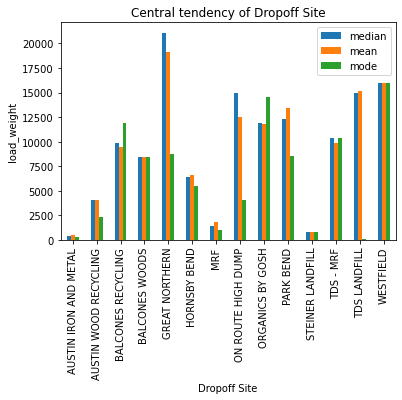

In [433]:
result.plot(kind='bar')
plt.xlabel('Dropoff Site')
plt.ylabel('load_weight')
plt.title('Central tendency of Dropoff Site')
plt.show()

###4. Pilih site yang paling menarik perhatian kamu, dan berikan alasannya.

**Which site drew my attention?**



---



I was instantly attracted to the `"TDS LANDFILL"` dropoff site because of the big difference in mean median and mode value.

When a column has a very high median value but a low mode value, it means that the column contains outliers or extreme values that are affecting the mean value. 

This situation is often an indication of a skewed distribution, where a small number of extreme values are pulling the mean value away from the majority of the values.

It is important to examine the data further and understand the reasons for the skewed distribution, as it can impact any further analysis or modeling that may be performed on the data. It may also be necessary to perform data cleaning or data transformations to address the issue.

### 5.Gunakan site yang kamu pilih untuk dicek apakah data load_weight ada outlier atau tidak. Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3).

In [434]:
tds_landfill = raw_data[raw_data['dropoff_site'] == 'TDS LANDFILL']

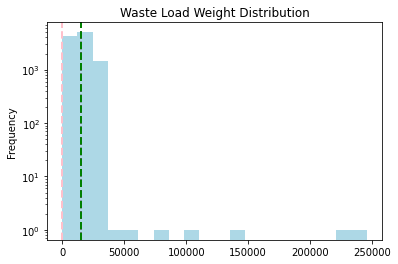

In [435]:
tds_landfill_weights = raw_data[raw_data['dropoff_site'] == 'TDS LANDFILL']['load_weight']

#Count mean median and mode for TDS LANDFILL SITE
tds_landfill_mean = result.loc['TDS LANDFILL', 'mean']
tds_landfill_median = result.loc['TDS LANDFILL', 'median']
tds_landfill_mode = result.loc['TDS LANDFILL', 'mode']



#Plot histogram of load weight distribution & showing central tendency values with dashed lines
tds_landfill_weights.plot.hist(title='Waste Load Weight Distribution', color='lightblue', bins=20, log=True)  
plt.axvline(tds_landfill_mean, color='purple', linestyle='dashed', linewidth=2)
plt.axvline(tds_landfill_median, color='green', linestyle='dashed', linewidth=2)
plt.axvline(tds_landfill_mode, color='pink', linestyle='dashed', linewidth=2)
plt.show()

As we can see there are outliers, Now we will calculate the skewness. It describes how far a distribution deviates from a symmetric shape and in which direction the deviation occurs.

In [436]:
# Calculate skewness
skewness = tds_landfill_weights.skew()

# Display skewness
print("Skewness:", skewness)

Skewness: 3.699282588641939


A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. This means that our data has a highly right skewed distribution.

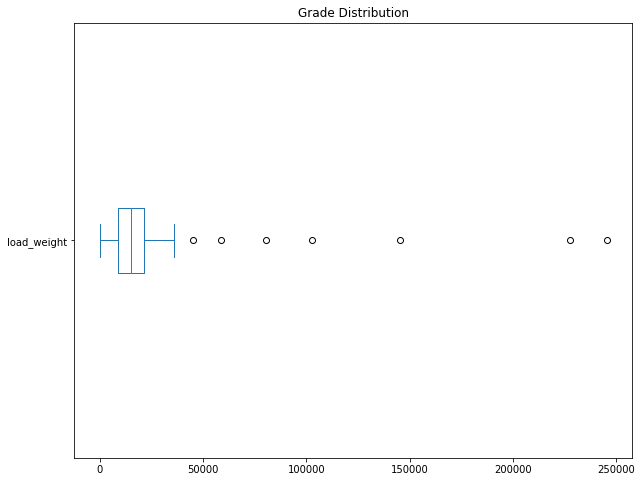

In [437]:
# Plot a box-whisker chart
tds_landfill_weights.plot(kind='box', title='Grade Distribution', figsize=(10,8),vert=False)
plt.show()

Since the data is NOT normally distributed and has a right skew, i will calcuate the quantiles, and the inter-quantile range using `"TURKEY'S RULE"`


`"IQR = 75th quantile -25th quantile"`

Calculate Upper Boundary:
`"Upper boundary = 75th quantile + (IQR * 1.5)"`

Calculate Lower Boundary:
`"Lower boundary = 25th quantile -(IQR * 1.5)"`

In [438]:
# Calculate the quantiles and IQR
Q1 = tds_landfill_weights.quantile(0.25)
Q3 = tds_landfill_weights.quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower fences
upper_fence = Q3 + (IQR * 1.5)
lower_fence = Q1 - (IQR * 1.5)



# Identify outliers
outlier_rows = tds_landfill_weights[(tds_landfill_weights < lower_fence) | (tds_landfill_weights > upper_fence)].index

# Drop the outliers
tds_landfill_weights.drop(outlier_rows, inplace=True)
raw_data.drop(outlier_rows, inplace=True)
tds_landfill.drop(outlier_rows, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now we will plot another bloxplot after the outlier rows have been `"dropped"`. As you can see there are no more outlier values

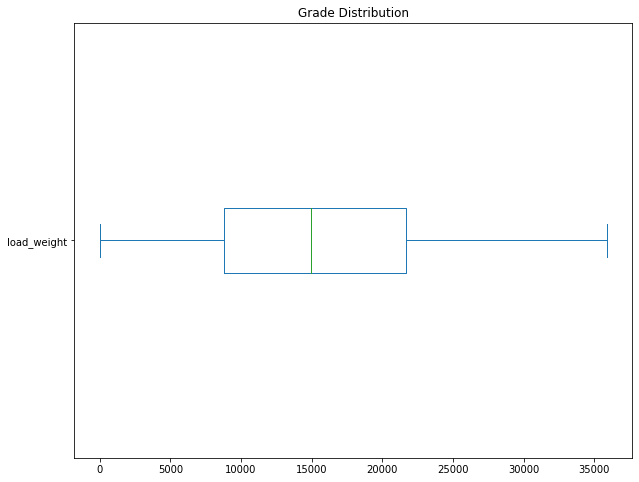

In [439]:
# Plot a box-whisker chart
tds_landfill_weights.plot(kind='box', title='Grade Distribution', figsize=(10,8),vert=False,)
plt.show()

We can calculate the skew again and now the result is very close to 1.

In [440]:
# Calculate skewness
skewness = tds_landfill_weights.skew()

# Display skewness
print("Skewness:", skewness)

Skewness: 0.01871436590032474


Now its time to compare the central tendency data before and after removing the outliers. As you can see there is a decrease in the average value.

In [441]:
tds_landfill_weights.describe().round(1)

count    10681.0
mean     15098.8
std       7851.3
min          0.1
25%       8820.0
50%      14920.0
75%      21660.0
max      35900.0
Name: load_weight, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


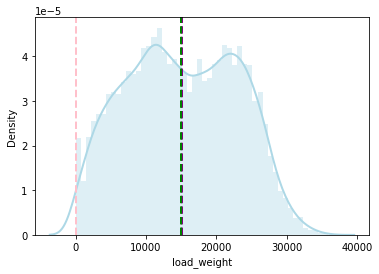

In [442]:
#Plot histogram and showing density line.

sns.distplot(tds_landfill_weights, hist=True, kde=True, rug=False, color='lightblue', bins=50, kde_kws={'linewidth': 2})
plt.axvline(tds_landfill_weights.mean(), color='purple', linestyle='dashed', linewidth=2)
plt.axvline(tds_landfill_weights.median(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(tds_landfill_mode, color='pink', linestyle='dashed', linewidth=2)
plt.show()



Eventhough there is still a slight positively skewed distribution (i.e. the tail of the distribution extends towards higher values). There is also a normal density function distribution.This indicates that the data has a heavier tail in the positive direction.

This means that we have a larger number of higher values compared to lower values. However, the normal density function indicates that the distribution of the values is symmetrical around the mean.

### 6. Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data load_weight. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier).

In [443]:
variance = np.var(tds_landfill_weights)
standard_deviation = np.std(tds_landfill_weights)
range = (tds_landfill_weights.min(), tds_landfill_weights.max())

print("Variance:", variance.round(1))
print("Standard Deviation:", standard_deviation.round(1))
print("Range:", range)

Variance: 61636740.3
Standard Deviation: 7850.9
Range: (0.1164, 35900.0)


The Standard Deviation and Range values shows that this data is widely distributed (Because of the high Standard Deviation value).

This made me wonder if the large range in `"load_weight"` is caused by the different types of `"load_type"`. 

I plotted all the data into scatter plot and color coded each weight report according to its datatype. 

<ipython-input-444-c2260d2b0581>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tds_landfill['color'] = tds_landfill['load_type'].map(lambda x: colors[x])


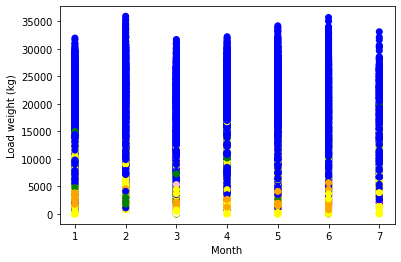

In [444]:
colors = {'GARBAGE COLLECTIONS': 'blue', 
          'SWEEPING': 'green',
          'BULK':'yellow',
          'MIXED LITTER':'orange',
          'RECYCLING - SINGLE STREAM':'pink',
          'ORGANICS':'white',
          'BRUSH':'cyan',
          'TIRES':'magenta',
          'DEAD ANIMAL':'yellow',
          'YARD TRIMMING':'white',
          'RECYCLED METAL':'green',
          'CONTAMINATED RECYCLING':'cyan',
          'CONTAMINATED ORGANICS':'pink',
          'LITTER':'orange',
          }
tds_landfill['color'] = tds_landfill['load_type'].map(lambda x: colors[x])

plt.scatter(tds_landfill['month'], tds_landfill['load_weight'], c=tds_landfill['color'], alpha=1)
plt.xlabel('Month')
plt.ylabel('Load weight (kg)')
plt.show()

As you can see, the `"load_weight"` of the other `"load_type"` creates a wide distribution and therefore a large standard deviation and range.

### 7. Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan confidence interval. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

To give advice on the size of the next `"waste site"` I will use the data from the TDS_LANDFILL.

**Why?**


---

The load_type with the biggest share of load_weight in our austi_waste_site dataset is `"GARBAGE COLLECTIONS"`. As shown on the second pie chart, the load_type with the biggest share of load_weight in our TDS_LANDFILL Waste site is also `"GARBAGE COLLECTIONS"`. This is why I decided to use `"TDS_LANDFILL"` as my sample mean.

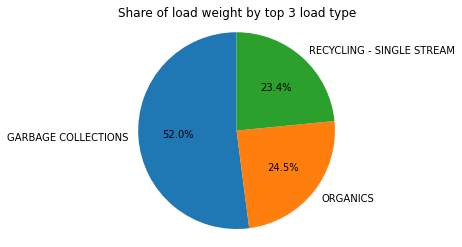

In [445]:
# Calculate the sum of 'load_weight' for each 'load_type'
load_type_group2 = raw_data.groupby('load_type').sum()

# Select the top 3 'load_type' with the biggest 'load_weight' sum
top_3_overall = load_type_group2.nlargest(3, 'load_weight')

# Plot pie chart
plt.pie(top_3_overall['load_weight'], labels=top_3_overall.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Share of load weight by top 3 load type')
plt.show()

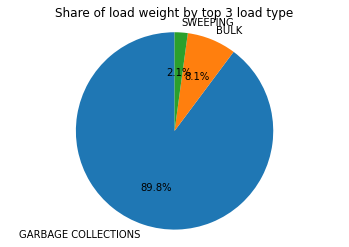

In [446]:
# Calculate the sum of 'load_weight' for each 'load_type'
load_type_group = tds_landfill.groupby('load_type').sum()

# Select the top 3 'load_type' with the biggest 'load_weight' sum
top_3 = load_type_group.nlargest(3, 'load_weight')

# Plot pie chart
plt.pie(top_3['load_weight'], labels=top_3.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Share of load weight by top 3 load type')
plt.show()

In [447]:
filtered_tds_landfill = raw_data[raw_data['dropoff_site'] == 'TDS LANDFILL']

sample_mean = filtered_tds_landfill["load_weight"].mean()

# Calculate the standard error of the sample mean
standard_error = raw_data[raw_data["dropoff_site"] == "TDS LANDFILL"]["load_weight"].std() / np.sqrt(len(raw_data[raw_data["dropoff_site"] == "TDS LANDFILL"]))

# Calculate the 95% confidence interval
confidence_interval_tds_landfill = stats.norm.interval(0.95, loc=sample_mean, scale=standard_error)

print("Sample mean, load_weight of TDS LANDFILL: ", sample_mean)
print("95% Confidence Interval of the average load_weight in TDS LANDFILL site: ", confidence_interval_tds_landfill)

Sample mean, load_weight of TDS LANDFILL:  15098.838642393035
95% Confidence Interval of the average load_weight in TDS LANDFILL site:  (14949.942894270853, 15247.734390515217)


**Message to the Mayor:** Based on the data, it is recommended that the next waste site has a average capacity between `"(14949.9 and 15247.7)"`

### 8. Buatlah analisa uji hipotesis dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (Ingat! pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima, jadi gunakan bahasa yang lebih manusiawi!).

`"Null Hypothesis (H0):"` There is no difference in the mean load weight between different types of waste in the TDS LANDFILL SITE.

`"Alternative Hypothesis (Ha):"` There is a difference in the mean load weight between different types of waste in the TDS LANDFILL SITE.



---

To test this hypothesis, we will use ANOVA (Analysis of Variance) test, to determine whether the mean load weight is significantly different between the different waste types. 

We will first divide the data into separate groups based on the load_type variable, and then compare the mean load_weight for each group using an ANOVA test.




---

**Determining result of experiment**

If the p-value from the ANOVA test is less than a chosen significance level (e.g., 0.05), we will reject the null hypothesis and conclude that there is a significant difference in the mean load weight between the different types of waste. 

If the p-value is greater than the significance level, we will fail to reject the null hypothesis and conclude that there is no significant difference in the mean load weight between the different types of waste.


In [448]:

# Divide the data into groups based on the load_type variable
group1 = tds_landfill[tds_landfill['load_type'] == 'GARBAGE COLLECTIONS']['load_weight']
group2 = tds_landfill[tds_landfill['load_type'] == 'SWEEPING']['load_weight']
group3 = tds_landfill[tds_landfill['load_type'] == 'BULK']['load_weight']

# Perform an ANOVA test to compare the means of the groups
f_value, p_value = stats.f_oneway(group1, group2, group3)

# Check the p-value against a chosen significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference in the mean load weight between the groups")
else:
    print("Fail to reject the null hypothesis - There is no significant difference in the mean load weight between the groups")

Reject the null hypothesis - There is a significant difference in the mean load weight between the groups


The result of our hypothesis shows that there is a significant difference in the mean load weight between the groups. This hypothesis result is further encouraged by the color-coded scatter plot we made in the previous question (No.7)

## Problem 2 (Math/Calculus)


Groupby raw_data based on report_date.

In [464]:
category_date= raw_data.groupby('report_date')['load_weight'].sum()
category_date.sort_values( ascending=True)
category_date.reset_index()

,report_date,load_weight
0,2021-01-02,2170130.0
1,2021-01-04,2920260.0
2,2021-01-05,2388540.0
3,2021-01-06,2396550.0
4,2021-01-07,2393350.0
...,...,...
160,2021-07-05,1897290.0
161,2021-07-06,1921640.0
162,2021-07-07,1553080.0
163,2021-07-08,1417650.0


In [457]:
#Find Weight today and yesterday
W1 = category_date.loc['2021-07-09']

W0 = category_date.loc['2021-07-08']

#Find the Delta Weight and Time
Delta_w = W1-W0
Delta_T = 1

#Calculate Velocity
Velocity = Delta_w / Delta_T

print('W1 AND W0:',W1,W0)
print('Delta_w:',Delta_w)
print('Velocity:',Velocity)

W1 AND W0: 120340.0 1417650.0
Delta_w: -1297310.0
Velocity: -1297310.0


In [470]:
x = np.array([W0,W1])
y = np.array([0,1])

In [474]:
v = np.gradient(y, x)


w_besok = v[-1] + v[-1]*1
np.abs(w_besok)

1.5416515713283642e-06

1. I use symbolic method.
2. Yes, you  need a mathematical function to calculate the derivative of a function. To calculate the derivative, you need to know the mathematical expression of the function.
3. 1.5416515713283642e-06